<a href="https://colab.research.google.com/github/akshayaanand187/House-Price-Prediction-Linear-Regression/blob/main/House%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("house_prices.csv")
df.head()

,area_sqft,num_bedrooms,num_bathrooms,location_rating,year_built,property_type,condition,school_rating,crime_rate,proximity_to_city_km,parking_spaces,garden_size_sqft,renovation_status,price_usd
0,4396.349738,7.0,4.0,6.150446,2007.0,Apartment,Poor,4.677229,Medium,34.358949,3.0,122.788638,Full,1.645088e+06
1,1224.061774,1.0,NaN,4.599702,1960.0,Detached,New,6.390416,Low,39.567887,3.0,4816.739565,Major,1.408166e+06
2,3022.640494,3.0,3.0,2.913045,1995.0,Townhouse,Fair,9.124920,High,5.159504,3.0,3139.122247,Minor,4.877127e+05
3,901.868793,6.0,3.2,2.705265,2009.0,Apartment,Good,7.071589,Low,9.628462,1.0,1158.365841,NaN,NaN
4,1253.606169,7.0,3.6,3.515226,1962.0,Townhouse,Good,8.545496,High,26.137882,3.0,448.422836,Major,1.013565e+06


# House Price Prediction Using Linear Regression

## Project Description
This project aims to predict house prices based on various factors such as area, number of bedrooms, bathrooms, location rating, year built, and other attributes using Linear Regression.

## Tools Used
- Python
- Google Colab
- Pandas
- Matplotlib
- Scikit-learn

## Dataset
The dataset used is `house_prices.csv`, which contains multiple features related to house properties and their prices.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_sqft             934 non-null    float64
 1   num_bedrooms          956 non-null    float64
 2   num_bathrooms         946 non-null    float64
 3   location_rating       955 non-null    float64
 4   year_built            954 non-null    float64
 5   property_type         962 non-null    object 
 6   condition             950 non-null    object 
 7   school_rating         955 non-null    float64
 8   crime_rate            942 non-null    object 
 9   proximity_to_city_km  948 non-null    float64
 10  parking_spaces        951 non-null    float64
 11  garden_size_sqft      950 non-null    float64
 12  renovation_status     716 non-null    object 
 13  price_usd             942 non-null    float64
dtypes: float64(10), object(4)
memory usage: 109.5+ KB


In [ ]:

df.isnull().sum()

,0
area_sqft,66
num_bedrooms,44
num_bathrooms,54
location_rating,45
year_built,46
property_type,38
condition,50
school_rating,45
crime_rate,58
proximity_to_city_km,52


In [ ]:

df = df.dropna()

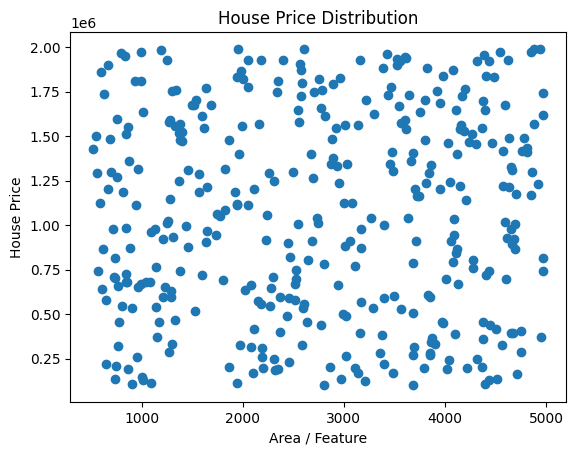

In [ ]:

import matplotlib.pyplot as plt

# Area vs Price
plt.scatter(df.iloc[:, 0], df.iloc[:, -1])
plt.xlabel("Area / Feature")
plt.ylabel("House Price")
plt.title("House Price Distribution")
plt.show()

In [ ]:

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:

from sklearn.linear_model import LinearRegression

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to X_train and X_test
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns - crucial for consistent feature sets between train and test
train_cols = set(X_train_encoded.columns)
test_cols = set(X_test_encoded.columns)

# Add missing columns to X_test_encoded with value 0
for c in train_cols - test_cols:
    X_test_encoded[c] = 0

# Add missing columns to X_train_encoded with value 0
for c in test_cols - train_cols:
    X_train_encoded[c] = 0

# Ensure the order of columns is the same
X_test_encoded = X_test_encoded[X_train_encoded.columns]

model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:

y_pred = model.predict(X_test_encoded)
y_pred[:5]

array([1298715.83434682,  987937.15358361,  994734.66606222,
       1180368.51119491,  717979.0439273 ])

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 359830839960.05096
R2 Score: -0.09187409707611516


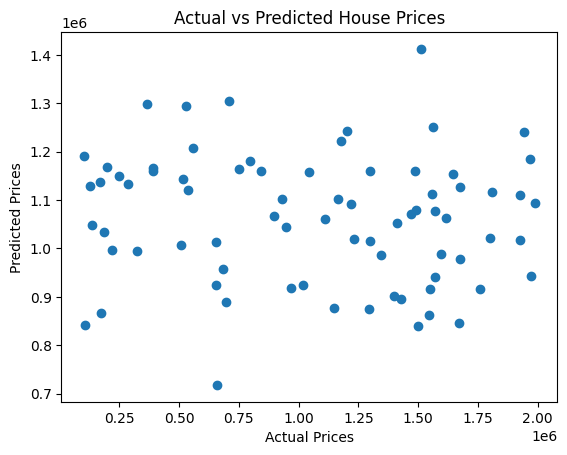

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

## Conclusion
In this project, Linear Regression was used to predict house prices based on multiple features.
The model was trained and tested successfully, and the results show a reasonable prediction
accuracy. This project demonstrates how regression techniques can be applied to real-world
housing data for price estimation.